<a href="https://colab.research.google.com/github/prashantpuri112/Australian-Weather-Prediction---PySpark/blob/main/Bigdata_Weather_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As part of module **6CS030 - Big Data** , my group and I completed a project related to Big Data under the supervision of **Basudeo Shrestha Sir**. We used Pyspark, a Python library, to efficiently process and analyze large datasets.

The project was a collaborative effort between myself and my teammate, **Prashant Puri (Uni ID: 2059631)** and **Nishant Shrestha (Uni ID: 2059740)**. Together, under **Basudeo Sir's** guidance, we defined the scope of the project, identified relevant data sources, performed data cleaning and transformation, and generated insights from the data using various analytical techniques.

Working on this project provided me with valuable experience in handling big data and using Pyspark for data analysis. It also allowed me to further develop my communication and presentation skills by presenting our findings to **Basudeo Sir**, as well as our peers. Overall, it was a rewarding and informative experience that I am grateful to have had the opportunity to work on with such a supportive and knowledgeable supervisor.

# Dataset Details
The dataset contains 23 columns which indicates following:
![data details](https://i.ibb.co/BjpJ4DJ/datadetails.png)

In [ ]:
#Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

### **Initialize Spark** and **Load Dataset**

Loading data from hdfs. 'weather_test_data.csv' contains test data and 'weather_train_data.csv' contains training data.

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=cc924ae58c04777f21ede98134d1661a77a30f1cbd66928ebe7baba049dfa71e
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark import SparkConf

In [ ]:
sc = SparkContext(master="local[*]")

In [ ]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
spark = SparkSession.builder.appName('australian-weather-prediction-spark').getOrCreate()

In [ ]:
test_path = "hdfs://localhost:9000/Dataset/weather_test_data.csv"
train_path = "hdfs://localhost:9000/Dataset/weather_train_data.csv"

In [ ]:
df_train = spark.read.format("csv").option("header", "true").load(train_path)
df_test = spark.read.format("csv").option("header", "true").load(test_path)

In [ ]:
df_train.count()

99516

In [ ]:
removed_duplicates = df_train.distinct()

In [ ]:
# no duplicates
removed_duplicates.count()

99516

In [ ]:
removed_duplicates.limit(5).toPandas()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row263,Albury,15.9,26.2,10.2,None,None,N,24,NE,...,82,56,1010.7,1008.6,7,5,17.6,24.7,Yes,0
1,Row367,Albury,4.6,19.9,0,None,None,SW,19,SSW,...,82,49,1023.8,1021.1,None,None,10.1,19.5,No,0
2,Row784,Albury,7.2,22.9,2.8,None,None,WSW,31,SE,...,55,32,1021.7,1019.7,None,None,13.8,20.8,Yes,0
3,Row824,Albury,17.8,35.5,0,None,None,ENE,31,SSE,...,52,18,1013.2,1009.2,None,None,24.6,34.5,No,0
4,Row1055,Albury,15.9,37,0,None,None,NNW,46,ESE,...,56,23,1015.2,1010.4,None,None,24.1,35,No,0


In [ ]:
df_train_data = removed_duplicates.drop("row ID")

In [ ]:
df_train_data.limit(5).toPandas()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,15.9,26.2,10.2,None,None,N,24,NE,NA,...,82,56,1010.7,1008.6,7,5,17.6,24.7,Yes,0
1,Albury,4.6,19.9,0,None,None,SW,19,SSW,W,...,82,49,1023.8,1021.1,None,None,10.1,19.5,No,0
2,Albury,7.2,22.9,2.8,None,None,WSW,31,SE,WSW,...,55,32,1021.7,1019.7,None,None,13.8,20.8,Yes,0
3,Albury,17.8,35.5,0,None,None,ENE,31,SSE,ESE,...,52,18,1013.2,1009.2,None,None,24.6,34.5,No,0
4,Albury,15.9,37,0,None,None,NNW,46,ESE,NE,...,56,23,1015.2,1010.4,None,None,24.1,35,No,0


### **Data Exploration**

In [ ]:
df_train_data.toPandas().describe().T

,count,unique,top,freq
Location,99516,49,Canberra,2393
MinTemp,99073,386,11,649
MaxTemp,99286,500,20,615
Rainfall,98537,601,0,63047
Evaporation,56985,327,4,2296
Sunshine,52199,145,0,1626
WindGustDir,99516,17,W,6843
WindGustSpeed,93036,67,35,6353
WindDir9am,99516,17,N,8052
WindDir3pm,99516,17,SE,7410


As shown in above data the count of values in specific columns are uneven indicating missing entries.

In [ ]:
from pyspark.sql.functions import col,isnan, when, count

##### List of empty entries for each column

In [ ]:
# This shows the list of empty data
df_train_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_train_data.columns]).toPandas().T

,0
Location,0
MinTemp,443
MaxTemp,230
Rainfall,979
Evaporation,42531
Sunshine,47317
WindGustDir,0
WindGustSpeed,6480
WindDir9am,0
WindDir3pm,0


### **Plot Categorical Data**

In [ ]:
# categorical data plotting
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]

In [ ]:
def plot_categorical_data(df, column_name, xlabel, title):
    # data
    data = df.rdd.map(lambda x: x[column_name]).collect()
    counter = Counter(data)
    x, y = counter.keys(), counter.values()
    
    # figure
    plt.figure(figsize=(12, 5))
    plt.bar(x, y, width=0.8, align="center")
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel(xlabel)
    plt.xticks(rotation=90)
    
    # plot text
    for i, (key, value) in enumerate(counter.items()):
        plt.text(i, value, f' {value} ', rotation=90, ha='center', va='top', color="white")
    plt.show()

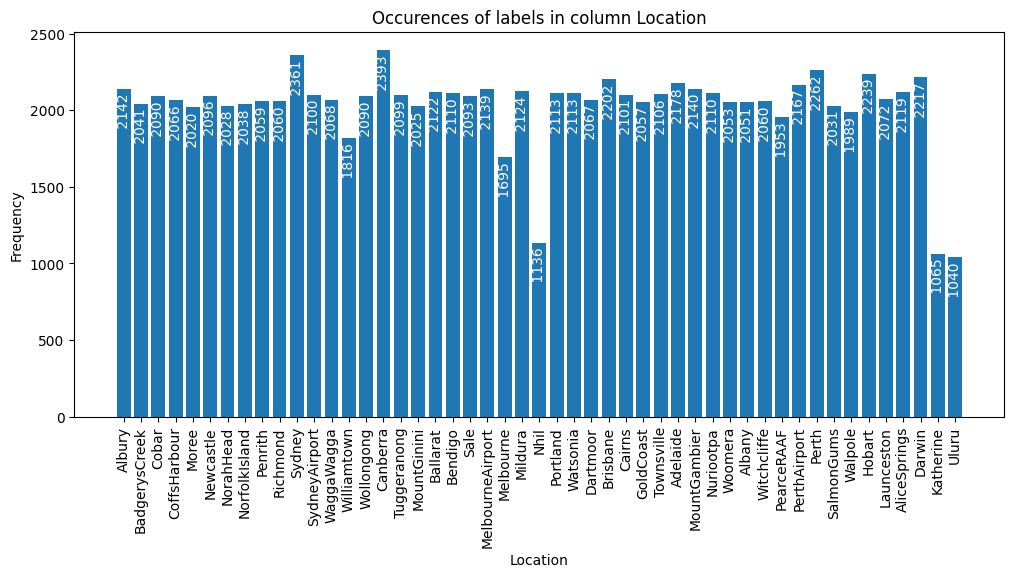

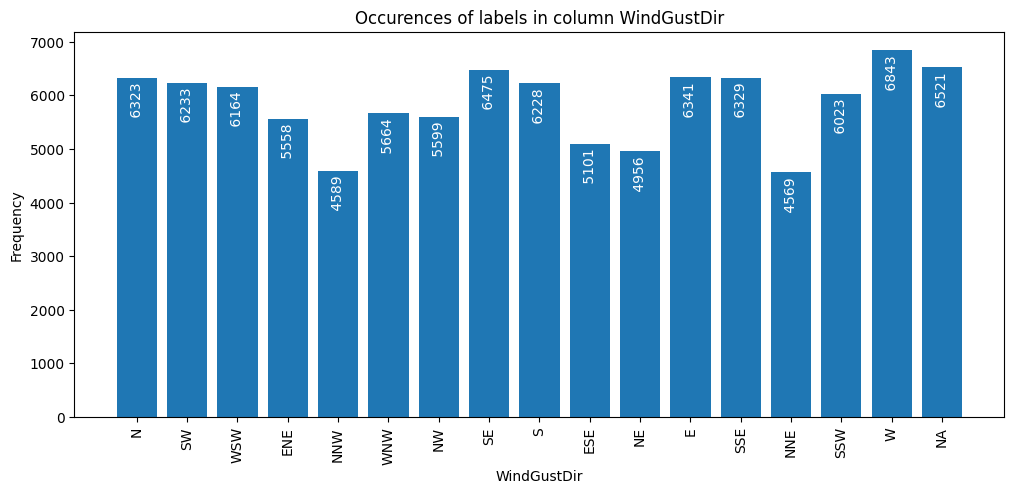

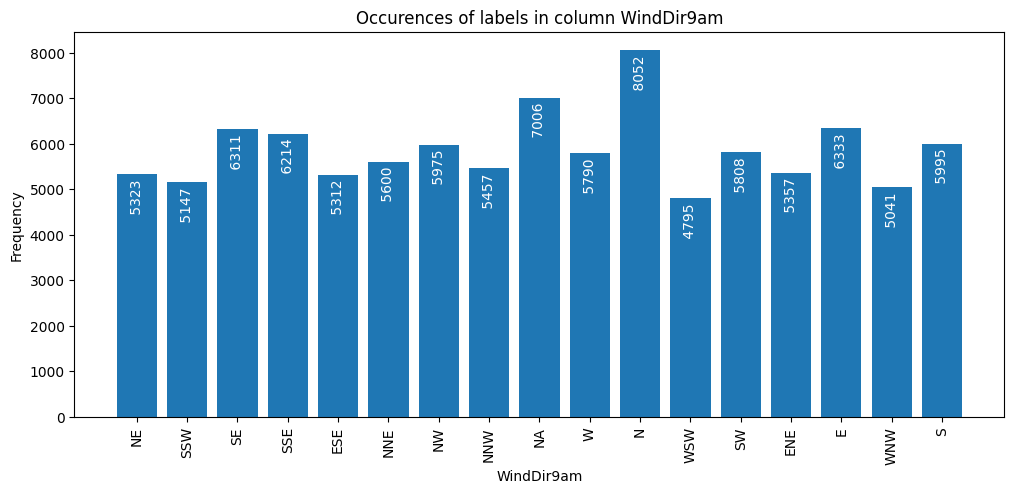

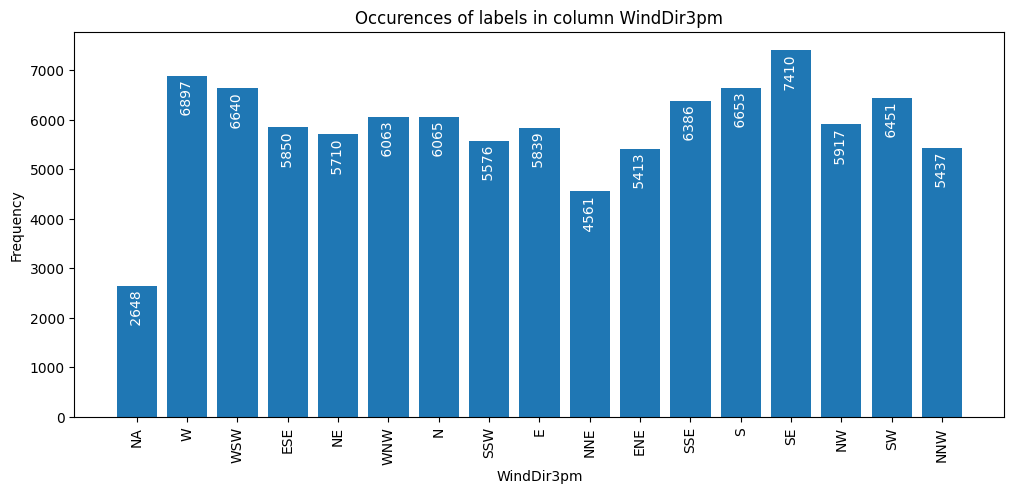

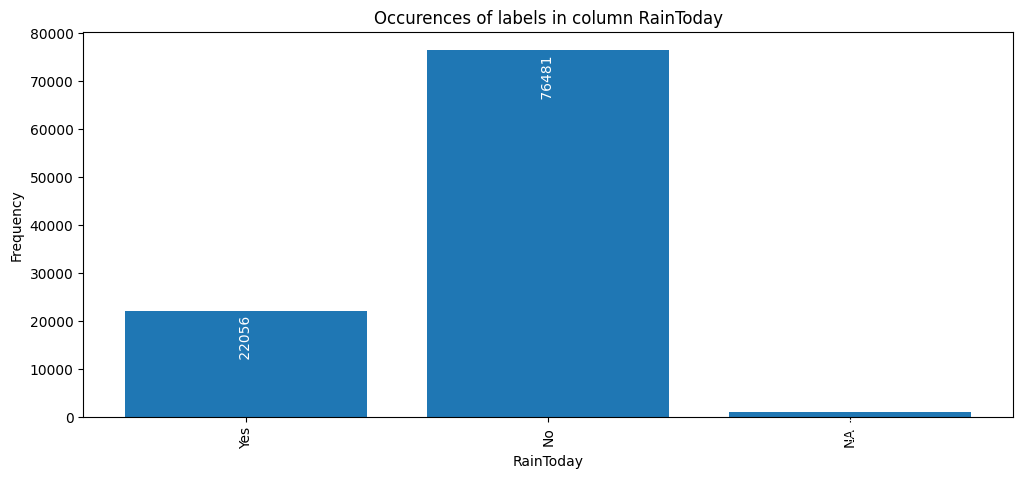

In [ ]:
for category in categorical_columns:
    plot_categorical_data(df_train_data, category, category, f"Occurences of labels in column {category}")

In [ ]:
# converting df_train to pandas dataframe for quick visualization
pd_train_df = df_train.toPandas()

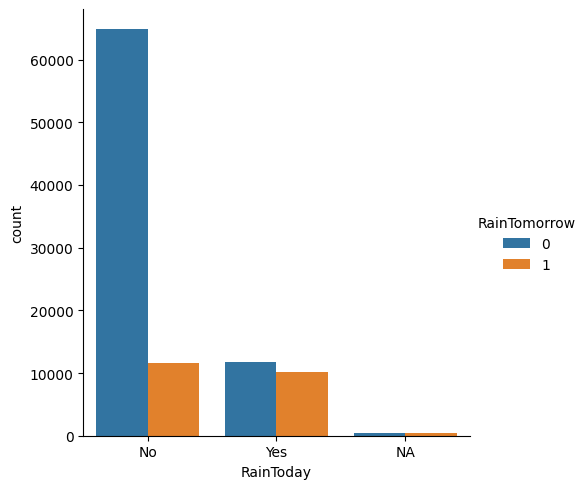

In [ ]:
import seaborn as sns 
sns.catplot(x="RainToday", kind="count", data=pd_train_df, hue="RainTomorrow");

In [ ]:
# Hence, the probability of raining tomorrow is high when there is rain today.

## **Plot Number Data**

In [ ]:
int_df = df_train_data.drop(*categorical_columns)
int_df = int_df.drop("RainTomorrow")

In [ ]:
int_df.limit(5).toPandas()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,15.9,26.2,10.2,None,None,24,11,0,82,56,1010.7,1008.6,7,5,17.6,24.7
1,4.6,19.9,0,None,None,19,4,11,82,49,1023.8,1021.1,None,None,10.1,19.5
2,7.2,22.9,2.8,None,None,31,7,11,55,32,1021.7,1019.7,None,None,13.8,20.8
3,17.8,35.5,0,None,None,31,6,11,52,18,1013.2,1009.2,None,None,24.6,34.5
4,15.9,37,0,None,None,46,9,15,56,23,1015.2,1010.4,None,None,24.1,35


### **Distribution**

In [ ]:
import seaborn as sns
import math

In [ ]:
def plot_histogram(df, columns, kind):
    width = math.ceil(len(columns) / 2 )
    fig, axs = plt.subplots(2, width, figsize=(15, 7))
    
    for i, column in enumerate(columns):
        data = df.rdd.map(lambda x: float(x[column]) if (x[column] is not None) else None).collect()
        if kind == "kde":
            sns.kdeplot(data, ax=axs[i % 2, i % width])
        else:
            sns.histplot(data, ax=axs[i % 2, i % width])
        axs[i % 2, i % width].set_title(column)
        
    fig.show()

In [ ]:
# kde for float values
kde = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]
# histogram for whole numbers
hist = ["WindGustSpeed", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm"]

#### **KDE and Histogram**

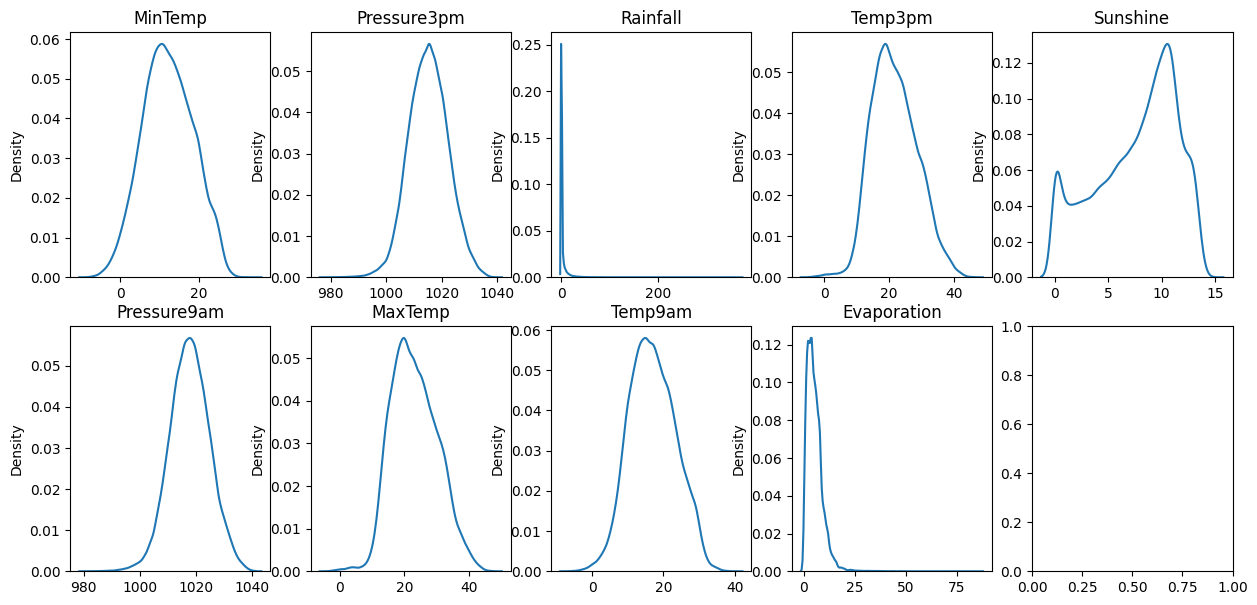

In [ ]:
plot_histogram(int_df, kde, "kde")

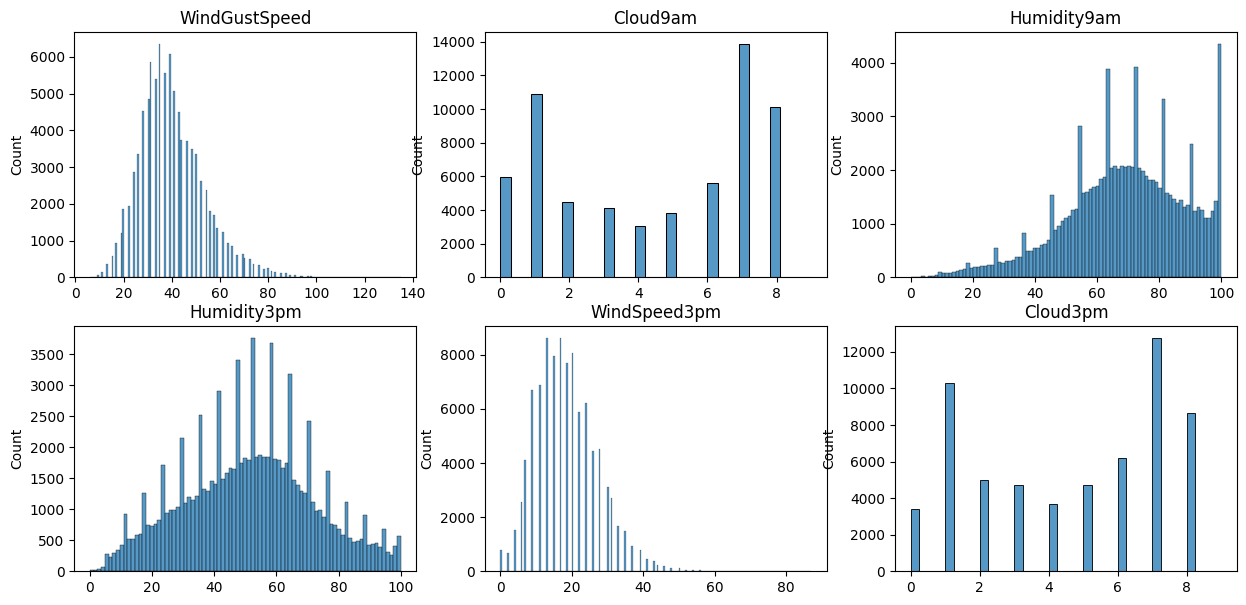

In [ ]:
plot_histogram(int_df, hist, "hist")

### **Pair Plot**

In [ ]:
pairplot_df = df_train_data.drop("Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday").toPandas()

In [ ]:
df = pairplot_df.astype(float)

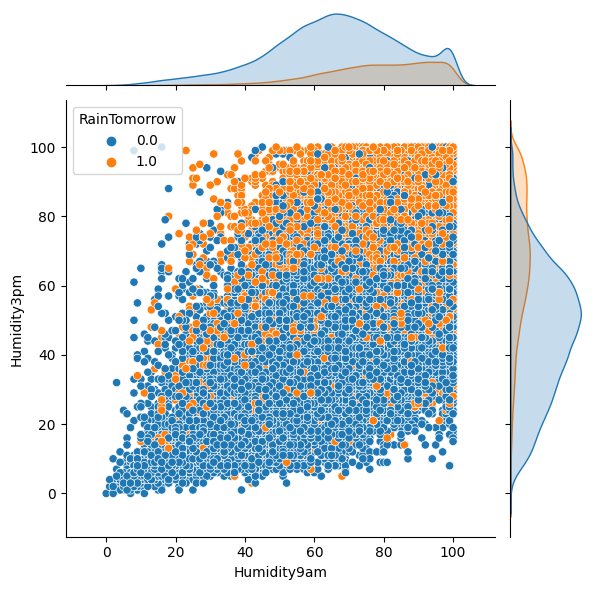

In [ ]:
sns.jointplot(data=df, dropna=True,x="Humidity9am", y="Humidity3pm", hue="RainTomorrow")

Hence, If the humidity is high then chances of rainfall is high.

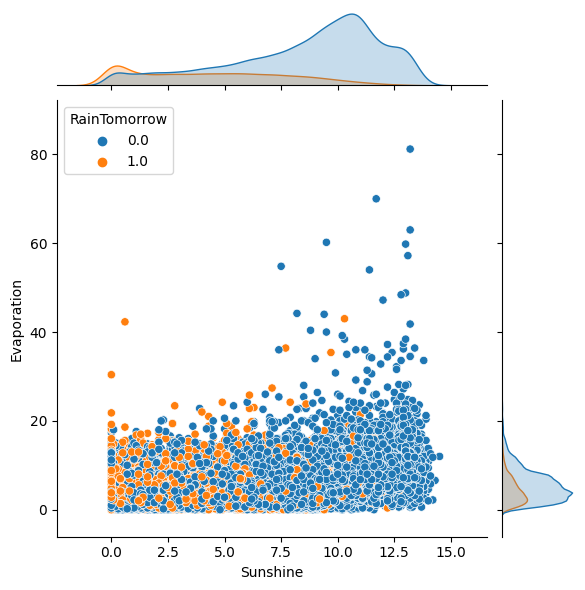

In [ ]:
sns.jointplot(data=df, x="Sunshine", y="Evaporation", hue="RainTomorrow");

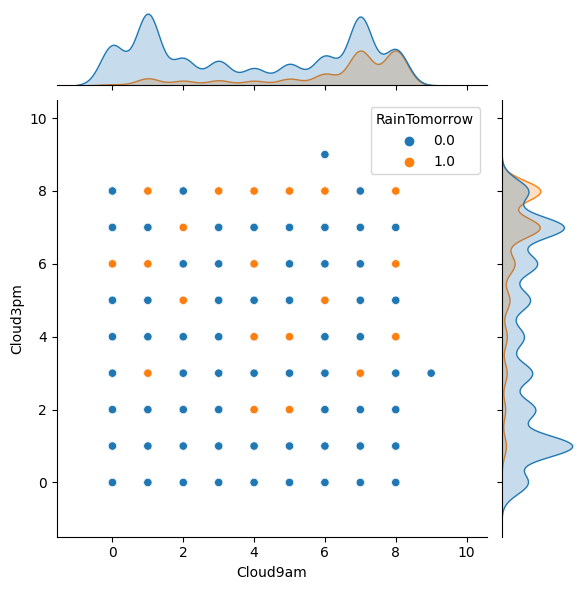

In [ ]:

sns.jointplot(data=df, x="Cloud9am", y="Cloud3pm", dropna=True, hue="RainTomorrow");

<Axes: >

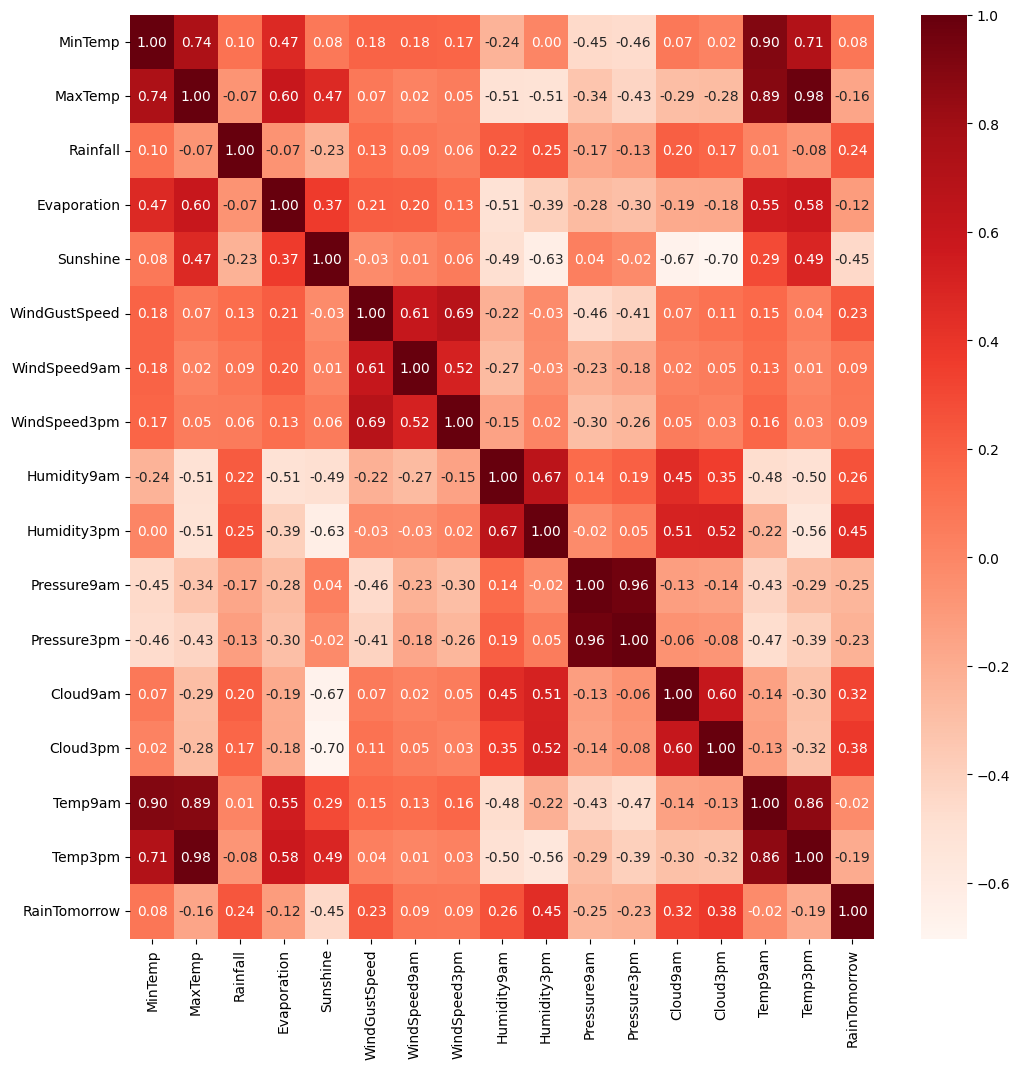

In [ ]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

## **Correlation Analysis**

#### **Temperature**
Temp3pm and MaxTemp has a high correlation with 0.98, which indicates that both features are linearly dependent. Which indicates that, those 1 of the 2 features can be disregarded. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable.

Considering the correlation to be as high as 0.98, we need to drop one of the feature. This is the same case as Temp9am and MinTemp.

Looking into the feature labels, this makes sense as the highest temperature on a day will be usually around mid afternoon and the lowest would be around morning hours.

#### **Pressure**
Oddly, this trend happends with pressure too, having 9 am and 3 pm to have oddly similar trend. One assumption would be that the feature pressure has no significant change throughout the day.

In [ ]:
df_corr_removed = df_train_data.drop("Temp3pm", "Temp9am", "Pressure9am")

In [ ]:
df_corr_removed.toPandas()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,15.9,26.2,10.2,None,None,N,24,NE,NA,11,0,82,56,1008.6,7,5,Yes,0
1,Albury,4.6,19.9,0,None,None,SW,19,SSW,W,4,11,82,49,1021.1,None,None,No,0
2,Albury,7.2,22.9,2.8,None,None,WSW,31,SE,WSW,7,11,55,32,1019.7,None,None,Yes,0
3,Albury,17.8,35.5,0,None,None,ENE,31,SSE,ESE,6,11,52,18,1009.2,None,None,No,0
4,Albury,15.9,37,0,None,None,NNW,46,ESE,NE,9,15,56,23,1010.4,None,None,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,22.1,42.7,0,None,None,E,65,E,ENE,13,31,16,9,1011.5,None,3,No,0
99512,Uluru,6.5,24.6,0,None,None,SE,31,SE,ESE,19,17,42,21,1021.2,None,None,No,0
99513,Uluru,13.5,26.4,0,None,None,WSW,33,S,WSW,9,15,34,45,1013.6,8,None,No,1
99514,Uluru,8,26.2,0,None,None,NW,28,SSE,NW,6,15,69,35,1014.6,3,None,No,0


## **Preprocessing**


We need to drop entries with too many nulls. Hacing too many nulls will not be helpful for training data as it has low information. 

The threshold will be 4 as it is deemed to be reasonable.

In [ ]:
df_corr_removed.limit(5).toPandas()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,15.9,26.2,10.2,None,None,N,24,NE,NA,11,0,82,56,1008.6,7,5,Yes,0
1,Albury,4.6,19.9,0,None,None,SW,19,SSW,W,4,11,82,49,1021.1,None,None,No,0
2,Albury,7.2,22.9,2.8,None,None,WSW,31,SE,WSW,7,11,55,32,1019.7,None,None,Yes,0
3,Albury,17.8,35.5,0,None,None,ENE,31,SSE,ESE,6,11,52,18,1009.2,None,None,No,0
4,Albury,15.9,37,0,None,None,NNW,46,ESE,NE,9,15,56,23,1010.4,None,None,No,0


In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]
convert_dict = dict((col, 'float') if col not in categorical_columns else (col, 'string') for col in df_corr_removed.columns)
 
df_train_pd = df_corr_removed.toPandas().astype(convert_dict)

###**Drop Nans**

In [ ]:
df_drop_na = df_train_pd.dropna(how='all')

In [ ]:
df_drop_na = df_train_pd.dropna(thresh=12)

In [ ]:
df_drop_na.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,15.9,26.2,10.2,NaN,NaN,N,24.0,NE,NA,11.0,0.0,82.0,56.0,1008.6,7.0,5.0,Yes,0.0
1,Albury,4.6,19.9,0.0,NaN,NaN,SW,19.0,SSW,W,4.0,11.0,82.0,49.0,1021.1,NaN,NaN,No,0.0
2,Albury,7.2,22.9,2.8,NaN,NaN,WSW,31.0,SE,WSW,7.0,11.0,55.0,32.0,1019.7,NaN,NaN,Yes,0.0
3,Albury,17.8,35.5,0.0,NaN,NaN,ENE,31.0,SSE,ESE,6.0,11.0,52.0,18.0,1009.2,NaN,NaN,No,0.0
4,Albury,15.9,37.0,0.0,NaN,NaN,NNW,46.0,ESE,NE,9.0,15.0,56.0,23.0,1010.4,NaN,NaN,No,0.0


Since most of the entries have null values at only Evaporation, Sunshine, Cloud9am and Cloud3pm. I will assume that we need at least 12 features present that is not Nan.

In [ ]:
df_drop = spark.createDataFrame(df_drop_na)
df_drop.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_drop.columns]).toPandas().T

,0
Location,0
MinTemp,186
MaxTemp,133
Rainfall,845
Evaporation,41919
Sunshine,46702
WindGustDir,0
WindGustSpeed,5954
WindDir9am,0
WindDir3pm,0


These features have almost 50% missing values (Nans):
+ Evaporation
+ Sunshine
+ Cloud9am
+ Cloud3pm

Having too much nans is not helpful, so we can remove these columns

In [ ]:
df_drop = df_drop.drop("Evaporation", "Cloud9am", "Cloud3pm")

In [ ]:
df_drop.limit(5).toPandas()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,Albury,15.9,26.2,10.2,NaN,N,24.0,NE,NA,11.0,0.0,82.0,56.0,1008.6,Yes,0.0
1,Albury,4.6,19.9,0.0,NaN,SW,19.0,SSW,W,4.0,11.0,82.0,49.0,1021.1,No,0.0
2,Albury,7.2,22.9,2.8,NaN,WSW,31.0,SE,WSW,7.0,11.0,55.0,32.0,1019.7,Yes,0.0
3,Albury,17.8,35.5,0.0,NaN,ENE,31.0,SSE,ESE,6.0,11.0,52.0,18.0,1009.2,No,0.0
4,Albury,15.9,37.0,0.0,NaN,NNW,46.0,ESE,NE,9.0,15.0,56.0,23.0,1010.4,No,0.0


### **Imputation**

In [ ]:
df_drop.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_drop.columns]).toPandas().T

,0
Location,0
MinTemp,186
MaxTemp,133
Rainfall,845
Sunshine,46702
WindGustDir,0
WindGustSpeed,5954
WindDir9am,0
WindDir3pm,0
WindSpeed9am,442


In [ ]:
# zero imputation
from pyspark.ml.feature import Imputer

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
impute_column = [columns for columns in df_drop.columns if columns not in categorical_columns]

In [ ]:
imputer = Imputer(inputCols=impute_column, outputCols=[f"{a}_imputed" for a in impute_column]).setStrategy("mean")
imputed_df = imputer.fit(df_drop).transform(df_drop).drop(*impute_column)

In [ ]:
for c in imputed_df.columns:
    if c not in categorical_columns:
        imputed_df = imputed_df.withColumnRenamed(c, c.replace("_imputed", ""))

In [ ]:
imputed_df.limit(5).toPandas()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm
0,Albury,N,NE,NA,Yes,0.0,15.9,26.2,10.2,7.61466,24.0,11.0,0.0,82.0,56.0,1008.6
1,Albury,SW,SSW,W,No,0.0,4.6,19.9,0.0,7.61466,19.0,4.0,11.0,82.0,49.0,1021.1
2,Albury,WSW,SE,WSW,Yes,0.0,7.2,22.9,2.8,7.61466,31.0,7.0,11.0,55.0,32.0,1019.7
3,Albury,ENE,SSE,ESE,No,0.0,17.8,35.5,0.0,7.61466,31.0,6.0,11.0,52.0,18.0,1009.2
4,Albury,NNW,ESE,NE,No,0.0,15.9,37.0,0.0,7.61466,46.0,9.0,15.0,56.0,23.0,1010.4


### **Convert categorical data**

In [ ]:
# One hot encoding
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [ ]:
def convert_to_one_hot(column, df):
    indexer = StringIndexer(inputCol=column, outputCol=f"{column}_numeric").fit(df)
    index = indexer.transform(df)
    index = index.drop(column)
    encoder = OneHotEncoder(inputCol=f'{column}_numeric', outputCol=f'{column}_vector').fit(index)
    index = encoder.transform(index)
    index = index.drop(f'{column}_numeric')
    return index, indexer, encoder

### **One hot encoding**

In [ ]:
encoders = dict()

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]

In [ ]:
encoded_df = imputed_df

In [ ]:
for columns in categorical_columns:
    encoded_df, indexer, encoder = convert_to_one_hot(columns, encoded_df)
    encoders[columns] = {"encoder": encoder, "indexer": indexer}
    encoded_df = encoded_df.withColumnRenamed(f"{columns}_vector", columns)

In [ ]:
encoded_df.limit(5).toPandas()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,0.0,15.9,26.2,10.2,7.61466,24.0,11.0,0.0,82.0,56.0,1008.6,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0)"
1,0.0,4.6,19.9,0.0,7.61466,19.0,4.0,11.0,82.0,49.0,1021.1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0)"
2,0.0,7.2,22.9,2.8,7.61466,31.0,7.0,11.0,55.0,32.0,1019.7,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0)"
3,0.0,17.8,35.5,0.0,7.61466,31.0,6.0,11.0,52.0,18.0,1009.2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0)"
4,0.0,15.9,37.0,0.0,7.61466,46.0,9.0,15.0,56.0,23.0,1010.4,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0)"


### **Feature Scaling**

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

In [ ]:
from pyspark.ml.feature import StandardScaler
def scale_data(data, column):
    scaler = StandardScaler(inputCol=column, outputCol=f"{column}_scaled", withStd=True, withMean=True)
    scalerModel = scaler.fit(data)
    scaled_df = scalerModel.transform(data)
    scaled_df = scaled_df.drop(f'{column}')
    return scaled_df, scalerModel

In [ ]:
non_categorical_columns = [columns for columns in encoded_df.columns if columns not in categorical_columns]

In [ ]:
scaled_df = encoded_df

In [ ]:
from pyspark.ml.feature import VectorAssembler
non_category_assembler = VectorAssembler(inputCols=non_categorical_columns, outputCol="non_category_features")
scaled_df = non_category_assembler.transform(scaled_df)
scaled_df, scaler = scale_data(scaled_df, "non_category_features")
scaled_df = scaled_df.drop(*non_categorical_columns)

In [ ]:
scaled_df.show()

+------------+---------------+---------------+---------------+---------------+-------------+----------------------------+
|RainTomorrow|       Location|    WindGustDir|     WindDir9am|     WindDir3pm|    RainToday|non_category_features_scaled|
+------------+---------------+---------------+---------------+---------------+-------------+----------------------------+
|         0.0| (48,[8],[1.0])| (16,[4],[1.0])|(16,[13],[1.0])|     (16,[],[])|(2,[1],[1.0])|        [0.58220613982465...|
|         0.0| (48,[8],[1.0])| (16,[5],[1.0])|(16,[14],[1.0])| (16,[1],[1.0])|(2,[0],[1.0])|        [-1.1883905332693...|
|         0.0| (48,[8],[1.0])| (16,[7],[1.0])| (16,[3],[1.0])| (16,[3],[1.0])|(2,[1],[1.0])|        [-0.7809966084866...|
|         0.0| (48,[8],[1.0])|(16,[12],[1.0])| (16,[4],[1.0])| (16,[9],[1.0])|(2,[0],[1.0])|        [0.87991708485815...|
|         0.0| (48,[8],[1.0])|(16,[15],[1.0])|(16,[12],[1.0])|(16,[11],[1.0])|(2,[0],[1.0])|        [0.58220613982465...|
|         1.0| (48,[8],[

### **Compile features into one column**

In [ ]:
removed_label = scaled_df.columns
removed_label.remove("RainTomorrow")

In [ ]:
removed_label

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'non_category_features_scaled']

In [ ]:
assembler = VectorAssembler(inputCols=removed_label, outputCol="features")

In [ ]:
scaled_df.show()

+------------+---------------+---------------+---------------+---------------+-------------+----------------------------+
|RainTomorrow|       Location|    WindGustDir|     WindDir9am|     WindDir3pm|    RainToday|non_category_features_scaled|
+------------+---------------+---------------+---------------+---------------+-------------+----------------------------+
|         0.0| (48,[8],[1.0])| (16,[4],[1.0])|(16,[13],[1.0])|     (16,[],[])|(2,[1],[1.0])|        [0.58220613982465...|
|         0.0| (48,[8],[1.0])| (16,[5],[1.0])|(16,[14],[1.0])| (16,[1],[1.0])|(2,[0],[1.0])|        [-1.1883905332693...|
|         0.0| (48,[8],[1.0])| (16,[7],[1.0])| (16,[3],[1.0])| (16,[3],[1.0])|(2,[1],[1.0])|        [-0.7809966084866...|
|         0.0| (48,[8],[1.0])|(16,[12],[1.0])| (16,[4],[1.0])| (16,[9],[1.0])|(2,[0],[1.0])|        [0.87991708485815...|
|         0.0| (48,[8],[1.0])|(16,[15],[1.0])|(16,[12],[1.0])|(16,[11],[1.0])|(2,[0],[1.0])|        [0.58220613982465...|
|         1.0| (48,[8],[

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "non_category_features_scaled"]
df = assembler.transform(scaled_df).drop(*categorical_columns)

In [ ]:
df = df.drop("non_category_features")

In [ ]:
df

DataFrame[RainTomorrow: double, features: vector]

# **Model Training**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
(trainingData, validationData) = df.randomSplit([0.8, 0.2])

In [ ]:
eval_accuracy = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
eval_precision = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="precisionByLabel")
eval_recall = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="recallByLabel")
eval_f1 = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1")

In [ ]:
def evaluate(predictions):
    accuracy = eval_accuracy.evaluate(predictions)
    prec = eval_precision.evaluate(predictions)
    f1 = eval_f1.evaluate(predictions)
    recall = eval_recall.evaluate(predictions)
    return {
        "accuracy": accuracy,
        "f1": f1,
        "precision": prec,
        "recall": recall
    }

In [ ]:
import seaborn as sns
def plot_confusion_matrix(predictions, title):
    x_axis_labels = ['No Rain Tomorrow', 'Rain Tomorrow']
    y_axis_labels = ['No Rain Tomorrow', 'Rain Tomorrow']
    result = sc.parallelize(predictions.rdd.map(lambda row: (row.prediction, row.indexedLabel)).collect())
    metric = MulticlassMetrics(result)
    cf_matrix = metric.confusionMatrix().toArray()
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels).set(title=title)

### **Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
labelIndexer = StringIndexer(inputCol="RainTomorrow", outputCol="indexedLabel").fit(df)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

In [ ]:
pipeline = Pipeline(stages=[labelIndexer, rf, labelConverter])
# Train model.  This also runs the indexers.
rf_model = pipeline.fit(trainingData)

In [ ]:
rf_predictions = rf_model.transform(validationData)

In [ ]:
rf_evaluation = evaluate(rf_predictions)

In [ ]:
rf_evaluation

{'accuracy': 0.8139254496131819,
 'f1': 0.7662253913649484,
 'precision': 0.811344805608668,
 'recall': 0.9901477832512315}

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


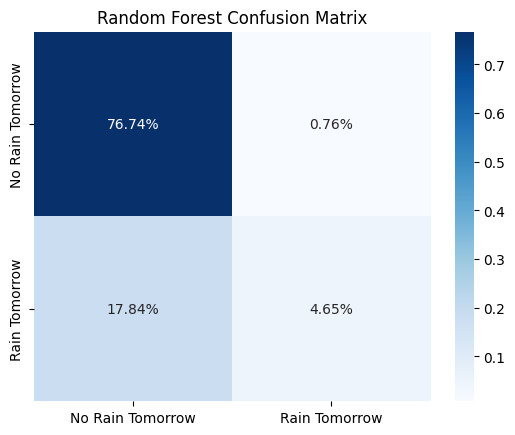

In [ ]:
plot_confusion_matrix(rf_predictions, "Random Forest Confusion Matrix")

### **Gradient Boosted**

In [ ]:
from pyspark.ml.classification import GBTClassifier

In [ ]:
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="features", maxIter=20)

In [ ]:
gbt_pipeline = Pipeline(stages=[labelIndexer, gbt])
gbt_model = gbt_pipeline.fit(trainingData)
gbt_predictions = gbt_model.transform(validationData)

In [ ]:
gbt_evaluation = evaluate(gbt_predictions)

In [ ]:
gbt_evaluation

{'accuracy': 0.8425600321511102,
 'f1': 0.8292539797976315,
 'precision': 0.8608665022895385,
 'recall': 0.950479647394348}

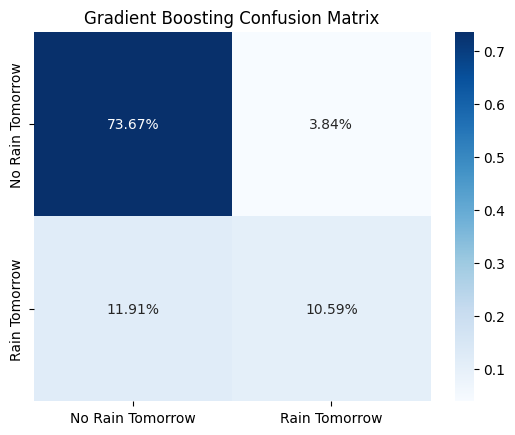

In [ ]:
plot_confusion_matrix(gbt_predictions, "Gradient Boosting Confusion Matrix")

### **Clustering**

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans
from pyspark.sql.types import DoubleType

In [ ]:
kmeans = KMeans().setK(2).setSeed(1)
kmeans_model = kmeans.fit(trainingData.drop("RainTomorrow"))

In [ ]:
kmeans_predictions = kmeans_model.transform(validationData)

In [ ]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features')
silhouette = evaluator.evaluate(kmeans_predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.2272321343466477


In [ ]:
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(trainingData.drop("RainTomorrow"))
pca_transformed = pca_model.transform(validationData)

In [ ]:
import numpy as np
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())

In [ ]:
cluster_assignment = np.array(kmeans_predictions.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

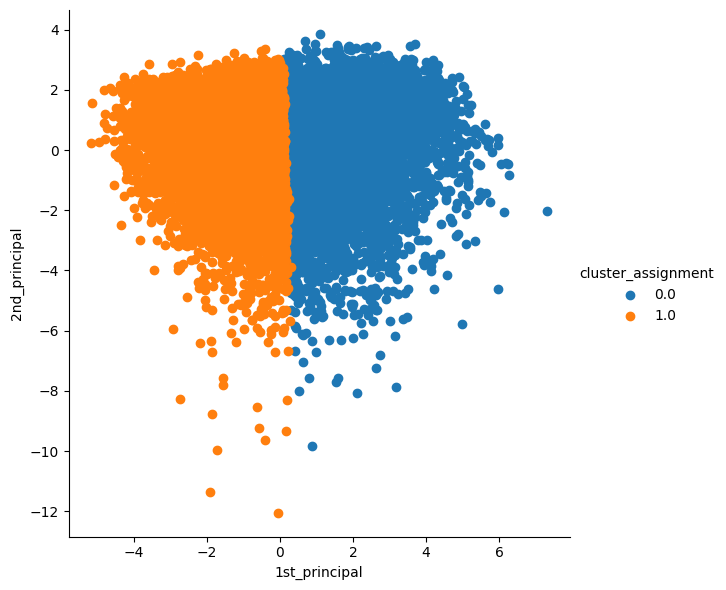

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_data = np.hstack((x_pca, cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df, hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()

## **Model Result**

#### **Drop unwanted columns**

In [ ]:
df_test_features = df_test.drop("row ID", "Evaporation", "Cloud9am", "Cloud3pm", "Pressure9am")

#### **Convert to float**

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]
convert_dict = dict((col, 'float') if col not in categorical_columns else (col, 'string') for col in df_test_features.columns)
df_test_pd = df_test_features.toPandas().astype(convert_dict)

In [ ]:
df_test_features = spark.createDataFrame(df_test_pd)

#### **Impute**

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
impute_column = [columns for columns in df_test_features.columns if columns not in categorical_columns]
imputedtest_df = imputer.fit(df_test_features).transform(df_test_features).drop(*impute_column)

In [ ]:
for c in imputedtest_df.columns:
    if c not in categorical_columns:
        imputedtest_df = imputedtest_df.withColumnRenamed(c, c.replace("_imputed", ""))

#### **One hot**

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]

In [ ]:
df_test_features = imputedtest_df

In [ ]:
for column in categorical_columns:
    encoder, indexer = encoders[column]["encoder"], encoders[column]["indexer"]
    df_test_features = indexer.transform(df_test_features)
    df_test_features = df_test_features.drop(column)
    df_test_features = encoder.transform(df_test_features)
    df_test_features = df_test_features.drop(f'{column}_numeric')
    df_test_features = df_test_features.withColumnRenamed(f"{column}_vector", column)

In [ ]:
df_test_features = non_category_assembler.transform(df_test_features)
df_test_features = scaler.transform(df_test_features)
df_test_features = df_test_features.drop(*non_categorical_columns)

In [ ]:
df_test_features

DataFrame[Location: vector, WindGustDir: vector, WindDir9am: vector, WindDir3pm: vector, RainToday: vector, non_category_features: vector, non_category_features_scaled: vector]

In [ ]:
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "non_category_features_scaled"]
df_test_features = assembler.transform(df_test_features).drop(*categorical_columns)
df_test_features = df_test_features.drop("non_category_features")

In [ ]:
def plot_test(data, xlabel, title):
    counter = Counter(data)
    x, y = counter.keys(), counter.values()
    
    # figure
    plt.figure(figsize=(12, 5))
    plt.bar(x, y, width=0.8, align="center")
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel(xlabel)
    plt.xticks(rotation=90)
    
    # plot text
    for i, (key, value) in enumerate(counter.items()):
        plt.text(i, value, f' {value} ', rotation=90, ha='center', va='top', color="white")
    plt.show()

### **Random Forest**

In [ ]:
rf_test_predictions = rf_model.transform(df_test_features)

In [ ]:
data = rf_test_predictions.select("prediction").rdd.map(lambda r: str(int(r.prediction))).collect()

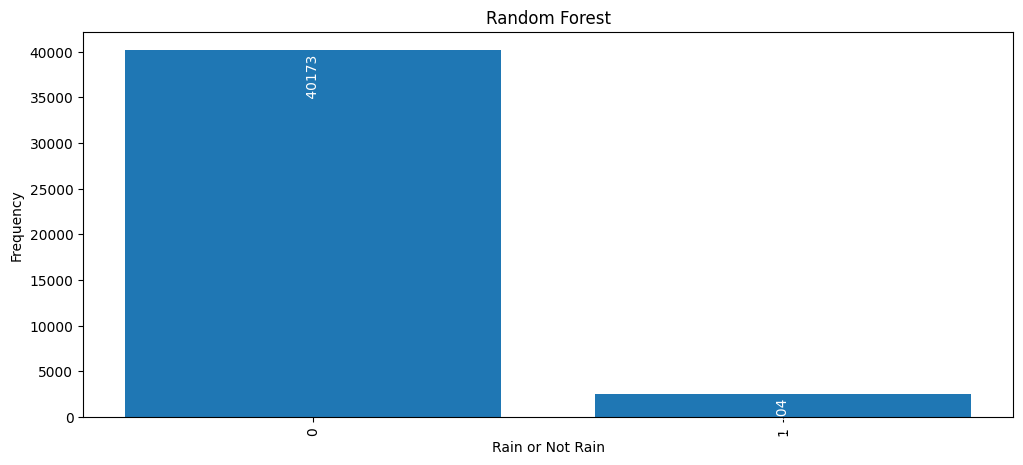

In [ ]:
plot_test(data, "Rain or Not Rain", "Random Forest")

### **Gradient Boosting**

In [ ]:
gbt_test_predictions = gbt_model.transform(df_test_features)

In [ ]:
data = gbt_test_predictions.select("prediction").rdd.map(lambda r: str(int(r.prediction))).collect()

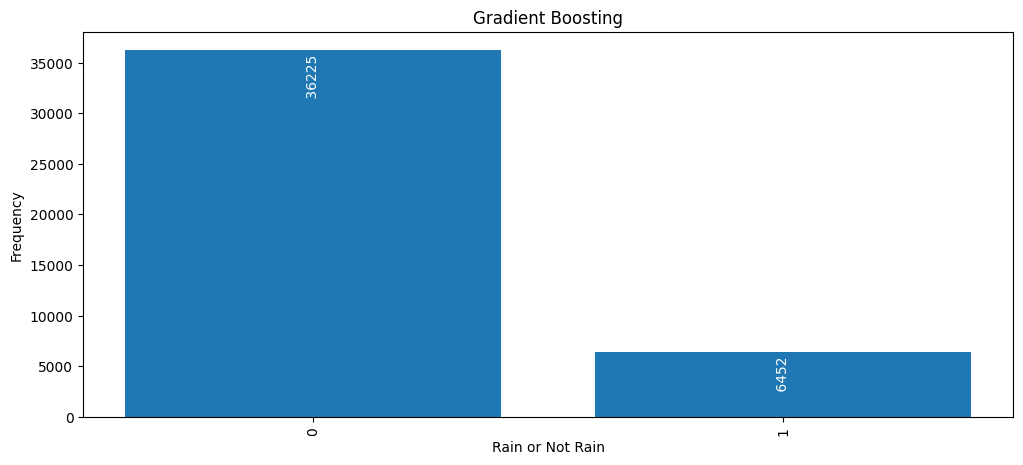

In [ ]:
plot_test(data, "Rain or Not Rain", "Gradient Boosting")

### **Kmeans**

In [ ]:
kmeans_test_predictions = kmeans_model.transform(df_test_features)

In [ ]:
data = kmeans_test_predictions.select("prediction").rdd.map(lambda r: str(int(r.prediction))).collect()

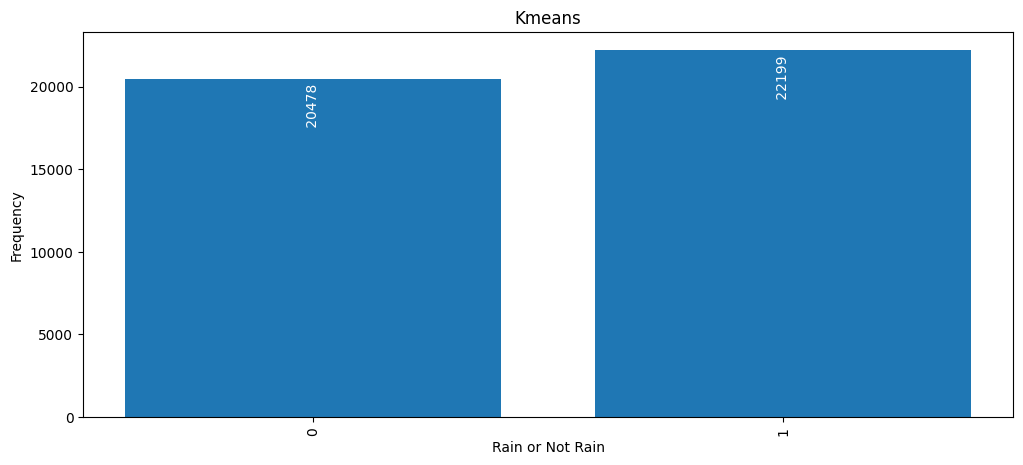

In [ ]:
plot_test(data, "Rain or Not Rain", "Kmeans")